In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
diabetes_std = StandardScaler().fit_transform(diabetes.data)

In [50]:
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


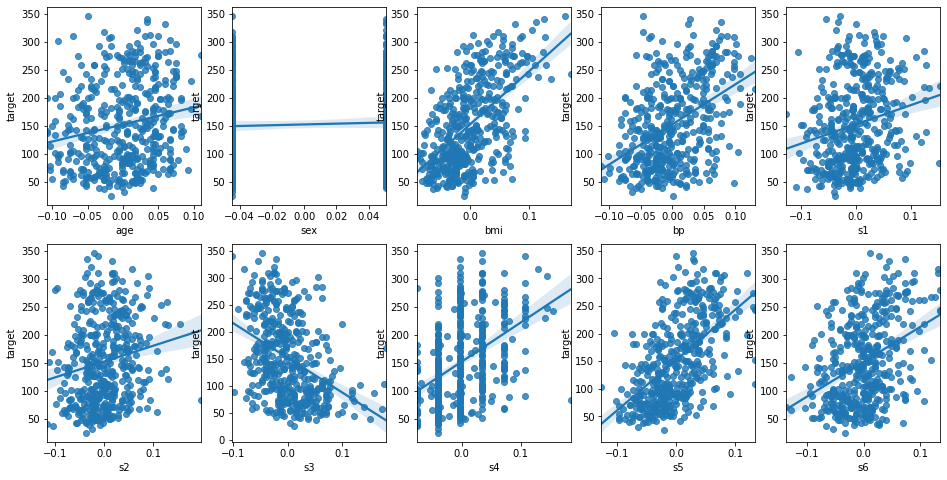

In [51]:
import seaborn as sns
fig,axs = plt.subplots(nrows=2,ncols=5, figsize=(16,8))
for i , feature in enumerate(diabetes.feature_names):
    row = i // 5
    col = i % 5
    sns.regplot(x=feature,y='target', data=df,ax=axs[row][col])


In [47]:
from sklearn.linear_model import LinearRegression
y = diabetes.target
for feature in diabetes.feature_names:
    X =df[[feature]]
    lr = LinearRegression()
    lr.fit(X,y)
    r2 = lr.score(X,y)
    print(f'{feature}:\t{r2:.4f}')


age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [48]:
from sklearn.linear_model import LinearRegression
y = diabetes.target
for feature in diabetes.feature_names:
    X =df[[feature]]
    lr = LinearRegression()
    lr.fit(X,y)
    r2 = lr.score(X,y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1 , random_state= 2021
)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [36]:
# 기울기 , X절편 
lr.coef_[0],lr.intercept_

(619.2228206843334, 152.13348416289614)

- Linear Regression 모델

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

- Decision Tree Regressor 모델

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred_dt = dtr.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test,pred_lr)
mes_dt = mean_squared_error(y_test,pred_dt)
print(f'MES - LR:{mse_lr:.4f}\n\tMES - DTR:{mes_dt:.4f}')


MES - LR:2370.1979
	MES - DTR:7196.6000


In [40]:
res = pd.DataFrame({ 
    'y_test':y_test,
    'lr' : pred_lr,
    'dt' : pred_dt,
})

In [41]:
res.head(5)

,y_test,lr,dt
0,155.0,156.031216,127.0
1,167.0,185.700495,118.0
2,185.0,162.863840,258.0
3,109.0,162.545441,128.0
4,65.0,78.518494,178.0


In [52]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [60]:
df = df[df['Gender'] =='M'][['Father','Height']]

In [62]:
df.head()

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [63]:
df.rename(columns={'Height':'Son'},inplace=True)
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [64]:
df = df * 2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


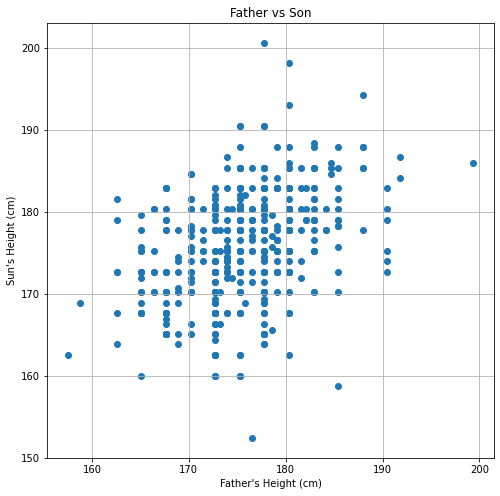

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father,df.Son)
plt.grid()
plt.xlabel("Father's Height (cm)" )
plt.ylabel("Sun's Height (cm)")
plt.title('Father vs Son')
plt.show()

- 회귀선 구하기

In [71]:
fp1 = np.polyfit(df.Father,df.Son, 1)
fp1

array([ 0.44774792, 97.17763701])

In [74]:
x = np.array([156,201])
y = fp1[0]*x + fp1[1] ## ax+b
y

array([167.02631215, 187.17496845])

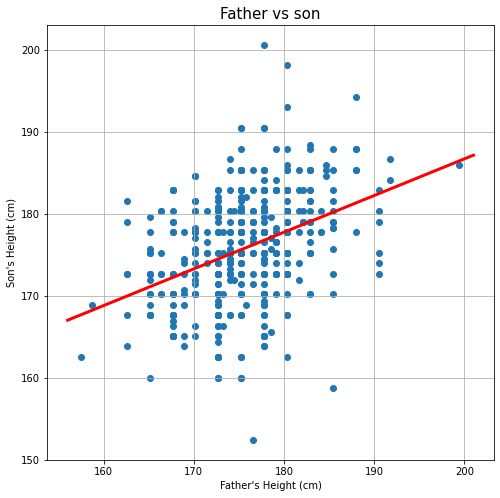

In [75]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father,df.Son)
plt.plot(x,y,'r-',lw=3)
plt.grid()
plt.xlabel("Father's Height (cm)")
plt.ylabel("Son's Height (cm)")
plt.title('Father vs son', fontsize = 15)
plt.show()

- Scikit-Learn

In [76]:
from sklearn.linear_model import LinearRegression

In [80]:
df[['Father']].shape

(465, 1)

In [83]:
lr = LinearRegression()
lr.fit(df[['Father']],df['Son'])
lr.coef_,lr.intercept_

(array([0.44774792]), 97.17763700739346)

In [84]:
lr._residues

17556.59951549399

In [85]:
lr.score(df[['Father']],df['Son'])

0.15312927478306992

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [87]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [88]:
X = df[['bmi']]
y = diabetes.target
X.shape,y.shape

((442, 1), (442,))

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [90]:
weight, bias = lr.coef_[0] , lr.intercept_
rss = lr._residues
weight,bias,rss

(949.4352603839491, 152.1334841628967, 1719581.810773882)

In [91]:
lr.score(X,y)

0.3439237602253803

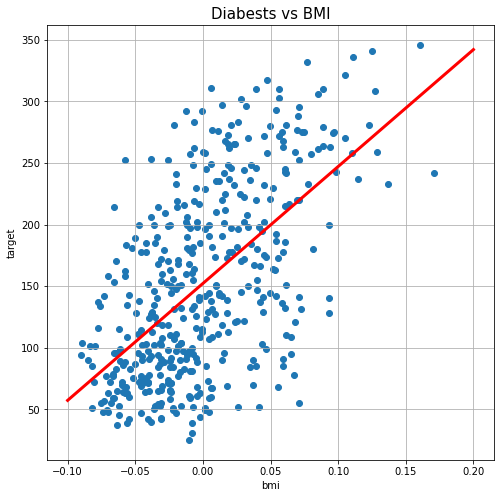

In [93]:
plt.figure(figsize=(8,8))
plt.scatter(df.bmi,df.target)
plt.plot([-0.1,0.2],[-0.1*weight+bias,0.2*weight+bias], 'r-',lw=3)
plt.grid()
plt.xlabel("bmi")
plt.ylabel("target")
plt.title('Diabests vs BMI',fontsize = 15)
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_trian,y_test = train_test_split(
    X,y, test_size=0.1, random_state=2021
)

In [100]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train)
pred = lr2.predict(X_test)

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.17874580965139086

In [103]:
lr2.score(X_test,y_test)

0.17874580965139086

In [104]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mse,rmse

(3577.1382963531237, 59.809182374892266)

- 당뇨병 vs BP

In [106]:
X = df[['bp']]
y = diabetes.target
X.shape,y.shape

((442, 1), (442,))

In [107]:
lr3 = LinearRegression()
lr3.fit(X,y)

LinearRegression()

In [108]:
weight,bias = lr3.coef_[0],lr3.intercept_
rss = lr3._residues
weight,bias,rss

(714.7416437042881, 152.13348416289585, 2110153.507189273)

In [109]:
lr3.score(X,y)

0.19490798886682947

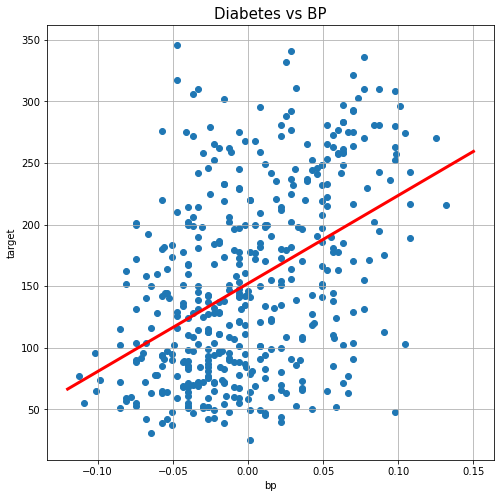

In [110]:
plt.figure(figsize=(8,8))
plt.scatter(df.bp,df.target)
plt.plot([-0.12,0.15],[-0.12*weight+bias,0.15*weight+bias], 'r-',lw=3)
plt.grid()
plt.xlabel("bp")
plt.ylabel("target")
plt.title('Diabetes vs BP',fontsize=15)
plt.show()

In [117]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
from sklearn.datasets import load_boston
boston = load_boston()

In [121]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [122]:
features = df.columns[1:-1]
print(features)

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

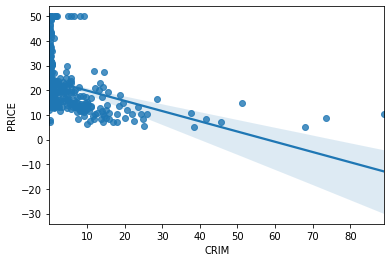

In [125]:
sns.regplot(x='CRIM',y="PRICE",data=df)

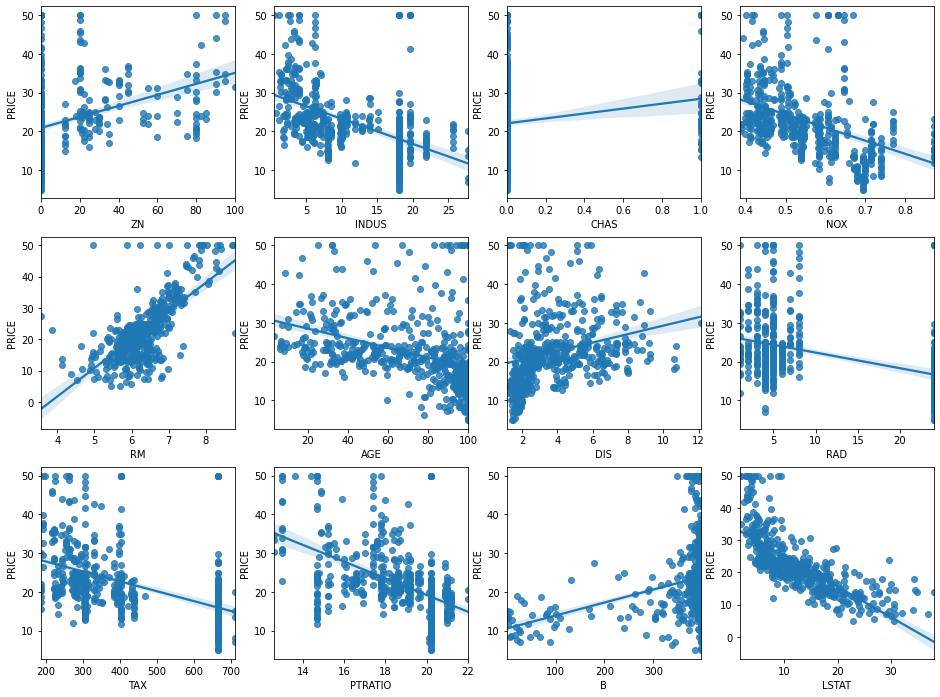

In [127]:
fig,axs = plt.subplots(nrows=3,ncols=4,figsize=(16,12))
for i , feature in enumerate(features):
    row,col = i//4 , i%4
    sns.regplot(x=feature,y='PRICE',data=df,ax=axs[row][col])

- 어떤 feature가 가격과 상관관계가 높을까?

In [131]:
from sklearn.linear_model import LinearRegression
y = boston.target
X = df[['CRIM']]
lr =LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.15078046904975717

In [134]:
for feature in boston.feature_names:
    X = df[[feature]]
    lr=LinearRegression()
    lr.fit(X,y)
    r2 = lr.score(X,y)
    print(f'{feature}:\t{r2:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


In [135]:
X = boston.data
y = boston.target
lr = LinearRegression()
lr.fit(X,y)


LinearRegression()

In [136]:
lr.score(X,y)

0.7406426641094095

In [139]:
lr.coef_,lr.intercept_

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 36.459488385089855)

In [140]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [149]:
np.dot(lr.coef_,boston.data[0]) + lr.intercept_

30.003843377016814

In [150]:
boston.target[0]

24.0

In [152]:
for i in range(5):
    pred = np.dot(lr.coef_, boston.data[i]) + lr.intercept_
    print(f'예측값 : {pred:.2f}, 실제값:{boston.target[i]}')

예측값 : 30.00, 실제값:24.0
예측값 : 25.03, 실제값:21.6
예측값 : 30.57, 실제값:34.7
예측값 : 28.61, 실제값:33.4
예측값 : 27.94, 실제값:36.2


In [153]:
lr.predict(boston.data[:5])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [157]:
lr.predict(boston.data[0:1])

array([30.00384338])